# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Utils import *

In [2]:
# Setting Environment to ignore future warnings
import warnings
warnings.simplefilter(action="ignore")

In [3]:
# Setting pandas default parameters
pd.set_option("max_rows", 85)
pd.set_option("max_columns", 85)

# Loading Data

In [4]:
main_data,df,num_cols = load_data()

In [5]:
main_data.shape

(2919, 80)

In [6]:
num_cols.shape

(36,)

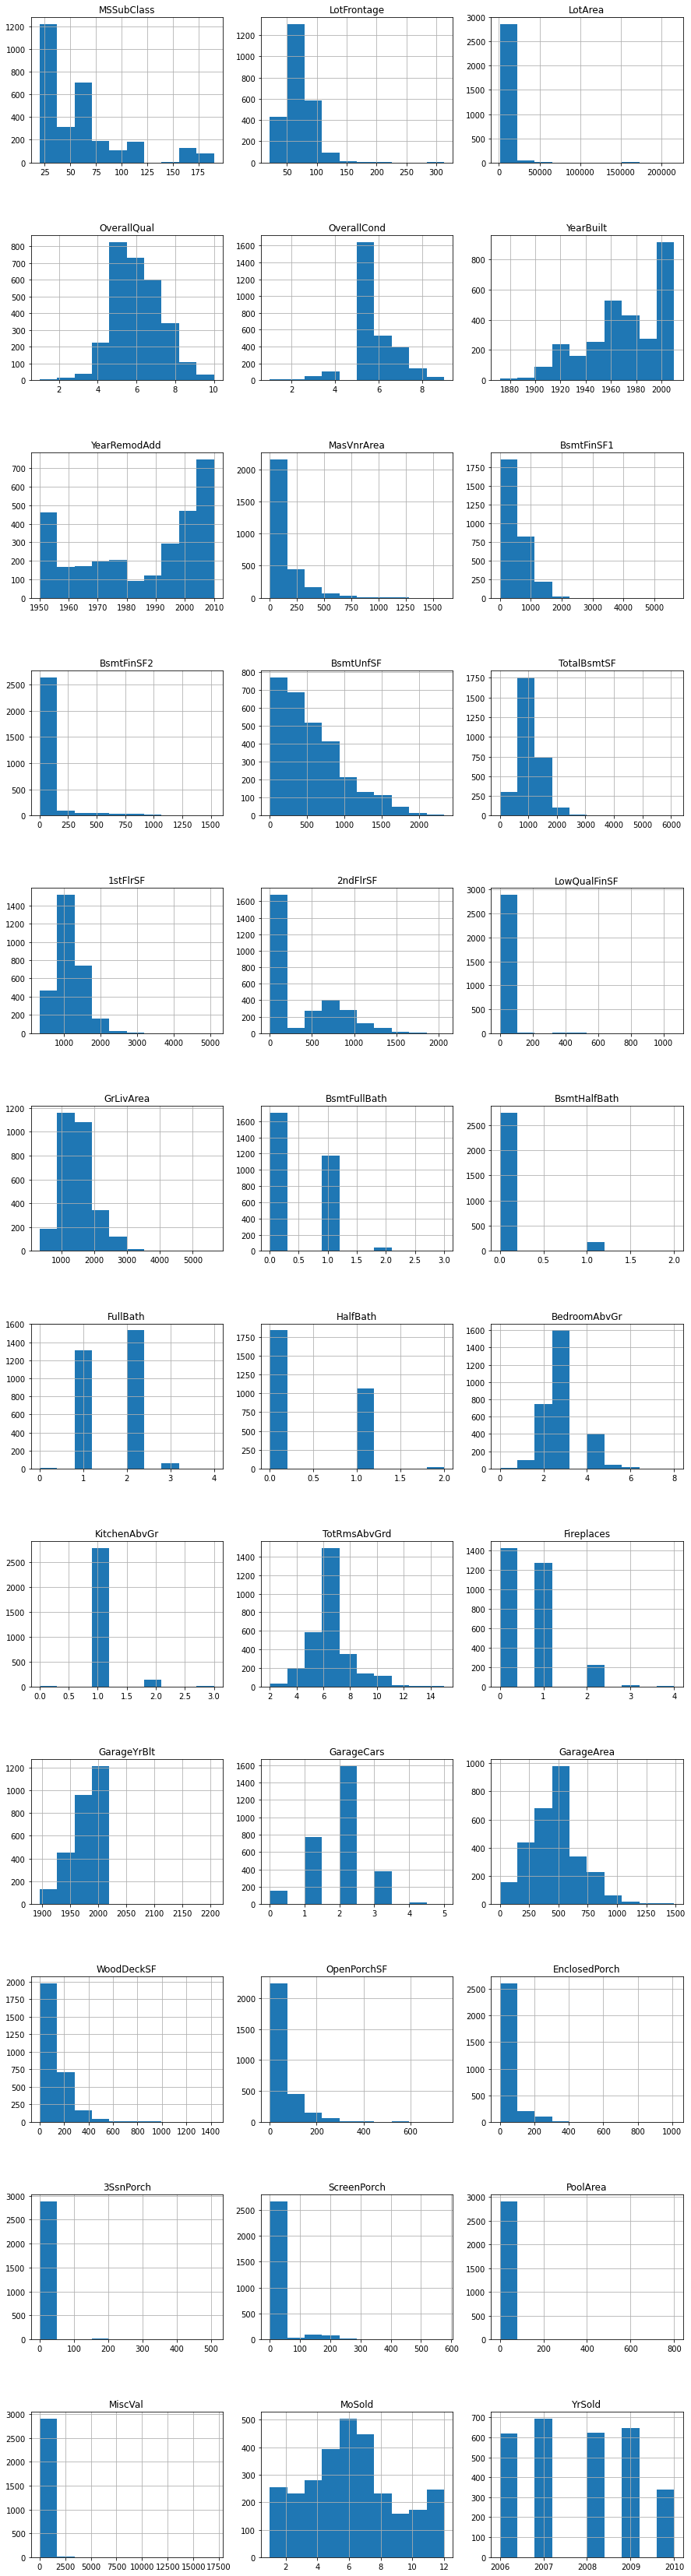

In [7]:
plot_num_cols(df, num_cols)


# Outlier Detection and Removal

Because we only have to check and remove outliers. So, we will deal only with Numerical features. Let's extract only numerical features from data.

In [8]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [9]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
LotFrontage,128,486,16.649538,float64
GarageYrBlt,103,159,5.447071,float64
MasVnrArea,444,23,0.787941,float64
BsmtFullBath,4,2,0.068517,float64
BsmtHalfBath,3,2,0.068517,float64
BsmtFinSF1,991,1,0.034258,float64
BsmtFinSF2,272,1,0.034258,float64
BsmtUnfSF,1135,1,0.034258,float64
TotalBsmtSF,1058,1,0.034258,float64


In [10]:
# Filling NAN with mean values
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)

In [11]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,


In [12]:
data = df.copy()

## Outlier removal wit STD Mean and model building

One of the ways we can remove outliers is remove any data points that are beyond 2 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [13]:
# detecting outliers in feature
for i in data.columns:
    df = std_mean(i, df, 2)

# Displaying outliers
outliers_statistics(df)

,Outliers,Percentage of Outliers
Feature,,
OverallCond,252,8.633094
GarageArea,234,8.016444
Fireplaces,231,7.913669
MSSubClass,207,7.091470
ScreenPorch,199,6.817403
LotFrontage,198,6.783145
OverallQual,195,6.680370
EnclosedPorch,193,6.611853
BedroomAbvGr,181,6.200754


In [14]:
# Total Number of Outliers in all features
outliers_statistics(df).Outliers.sum()

4537

In [15]:
# Preparing data for model
X_train, X_test, y_train, y_test, new_df = prepare_data(df,main_data,num_cols)

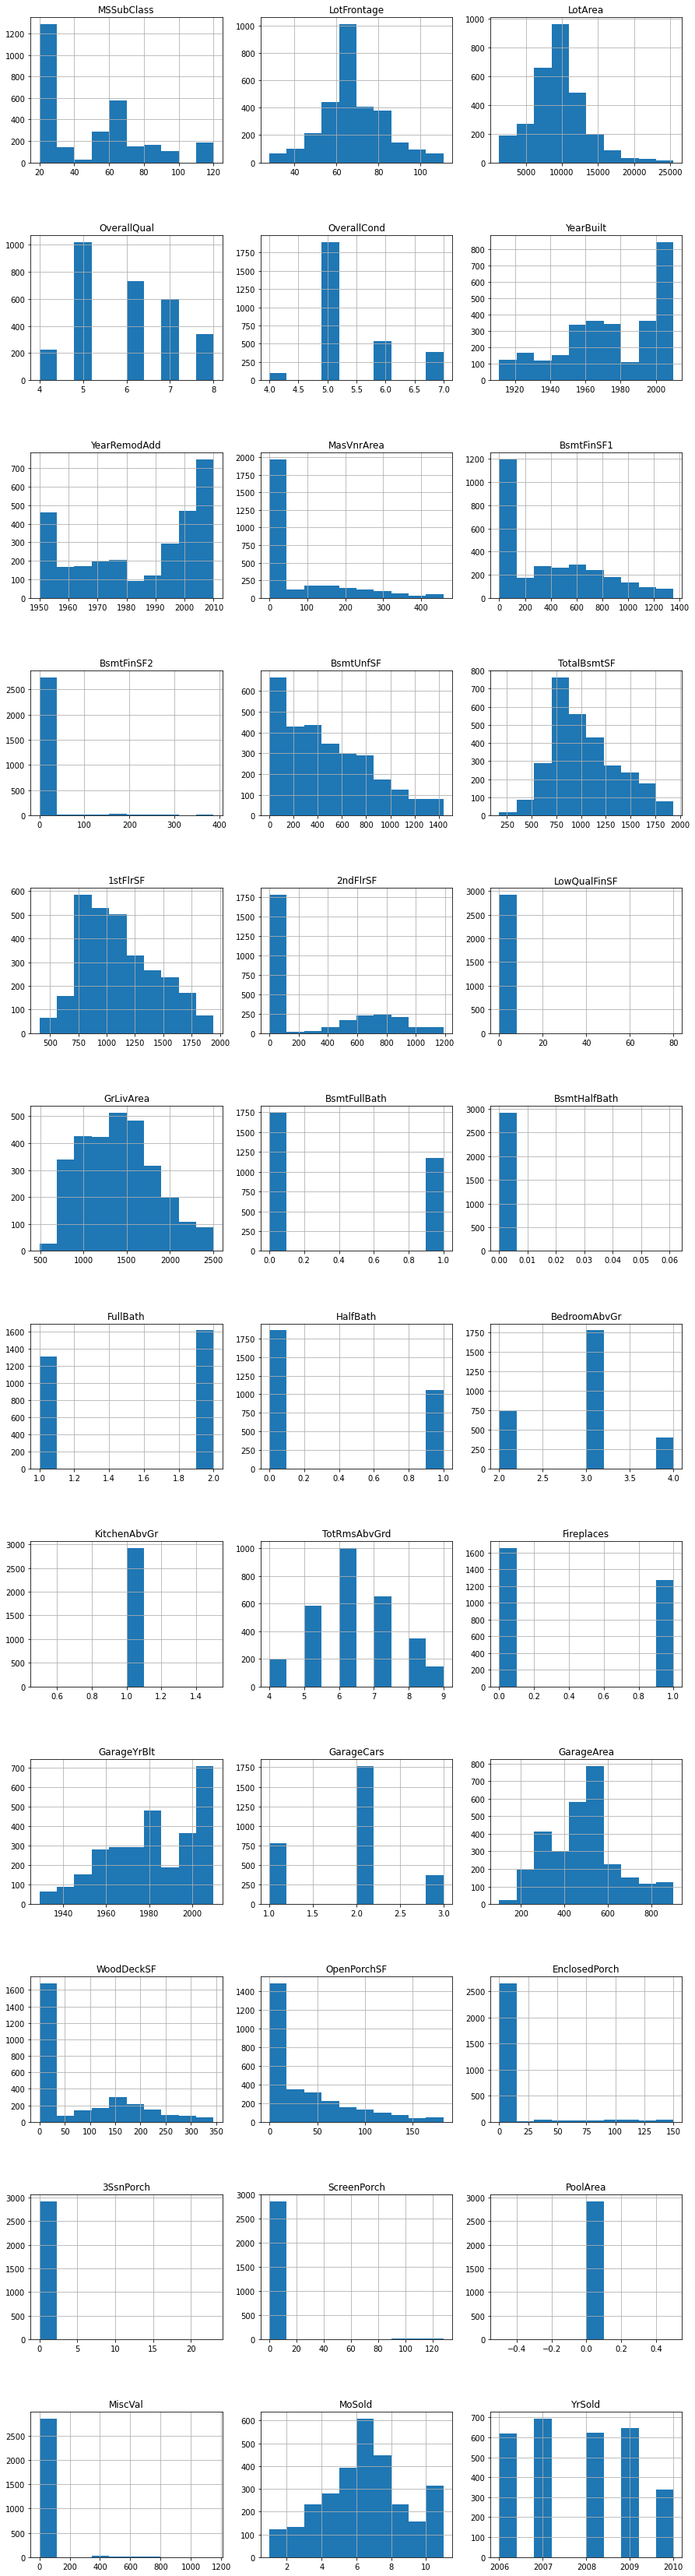

In [16]:
plot_num_cols(new_df, num_cols)

In [17]:
run_model("STD Mean", X_train, y_train)

Model Accuracy : 0.976773617845602


## Outlier removal wit STD Median and model building

In [18]:
df = data.copy()

In [19]:
# detecting outliers in feature
for i in data.columns:
    df = std_median(i, df,2)

# Displaying outliers
outliers_statistics(df)

,Outliers,Percentage of Outliers
Feature,,
2ndFlrSF,440,15.073655
YearRemodAdd,375,12.846865
WoodDeckSF,302,10.346009
MasVnrArea,250,8.564577
EnclosedPorch,239,8.187736
GarageArea,228,7.810894
ScreenPorch,224,7.673861
BsmtUnfSF,210,7.194245
MSSubClass,207,7.091470


In [20]:
# Total Number of Outliers in all features
outliers_statistics(df).Outliers.sum()

5450

In [21]:
# Preparing data for model
X_train, X_test, y_train, y_test, new_df = prepare_data(df,main_data,num_cols)

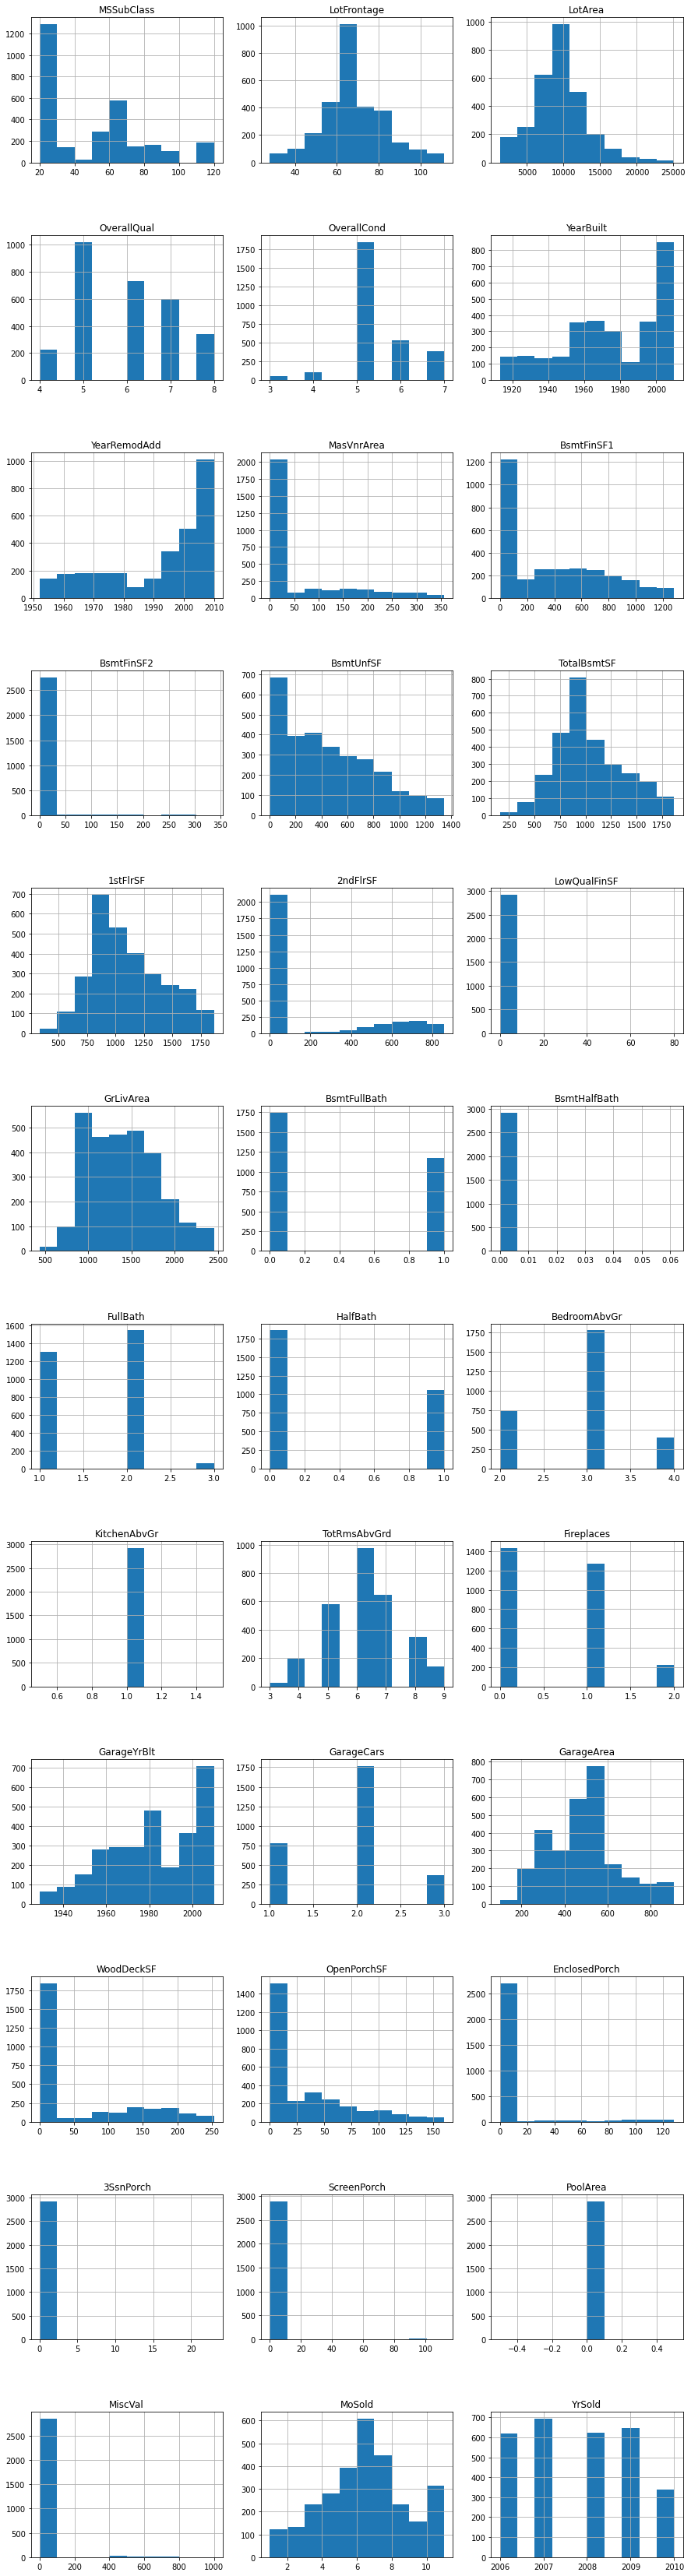

In [22]:
plot_num_cols(new_df, num_cols)

In [23]:
run_model("STD Median", X_train, y_train)

Model Accuracy : 0.9759795485142357


## Outlier removal with EllipticEnvelope and model building

In [24]:
df = set_data(main_data,num_cols)

In [25]:
from sklearn.covariance import EllipticEnvelope
ellip = EllipticEnvelope()
ellip.fit(df.drop("SalePrice", axis=1))

EllipticEnvelope()

In [26]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = ellip.predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [27]:
X_train, X_test, y_train, y_test = split_data(df)

In [28]:
run_model("EllipticEnvelopen", X_train, y_train)

Model Accuracy : 0.9093019516027412


## Outlier removal with LocalOutlierFactor and model building

In [29]:
df = set_data(main_data,num_cols)

In [30]:
from sklearn.neighbors import LocalOutlierFactor
fac = LocalOutlierFactor()
fac.fit(df.drop("SalePrice", axis=1))

LocalOutlierFactor()

In [31]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = fac.fit_predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [32]:
X_train, X_test, y_train, y_test = split_data(df)

In [33]:
run_model("LocalOutlierFactor", X_train, y_train)

Model Accuracy : 0.9111590470237111


## Outlier removal with IsolationForest and model building

In [34]:
df = set_data(main_data,num_cols)

In [35]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
iso.fit(df.drop("SalePrice", axis=1))

IsolationForest()

In [36]:
# predict returns 1 for an inlier and -1 for an outlier
y_pred = iso.fit_predict(df.drop("SalePrice", axis=1))
df["outlier"] = y_pred

# Dropping outliers
df = df[df.outlier == 1]

In [37]:
X_train, X_test, y_train, y_test = split_data(df)

In [38]:
run_model("IsolationFactor", X_train, y_train)

Model Accuracy : 0.9120177599936707


# None

In [39]:
df = set_data(main_data,num_cols)
X_train, X_test, y_train, y_test = split_data(df)

In [40]:
run_model("None", X_train, y_train)

Model Accuracy : 0.9119144086406505


# Comparison

In [41]:
comp = pd.DataFrame({"Method": method_name, "Model's Performances": model_score})
comp.sort_values("Model's Performances", ascending=False, inplace=True)
comp

,Method,Model's Performances
0,STD Mean,0.976774
1,STD Median,0.975980
4,IsolationFactor,0.912018
5,None,0.911914
3,LocalOutlierFactor,0.911159
2,EllipticEnvelopen,0.909302
